In [1]:
import os
train_dir = r"C:\Users\Lenovo\OneDrive\Desktop\dysgraphia_project\dataset_char\Dataset Dyslexia_Password WanAsy321\Gambo\Train"
test_dir = r"C:\Users\Lenovo\OneDrive\Desktop\dysgraphia_project\dataset_char\Dataset Dyslexia_Password WanAsy321\Gambo\Test"


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


In [5]:
IMG_SIZE = 64
BATCH_SIZE = 32

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=10,
                                   zoom_range=0.1,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   horizontal_flip=False)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode="grayscale",
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode="grayscale",
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)


Found 151649 images belonging to 3 classes.
Found 56724 images belonging to 3 classes.


In [6]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes: corrected, normal, reversal
])


C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [8]:
EPOCHS = 10

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=test_generator
)


C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
4740/4740 ━━━━━━━━━━━━━━━━━━━━ 633s 132ms/step - accuracy: 0.7736 - loss: 0.5773 - val_accuracy: 0.8456 - val_loss: 0.4697
Epoch 2/10
4740/4740 ━━━━━━━━━━━━━━━━━━━━ 636s 134ms/step - accuracy: 0.9066 - loss: 0.2609 - val_accuracy: 0.8694 - val_loss: 0.4183
Epoch 3/10
4740/4740 ━━━━━━━━━━━━━━━━━━━━ 597s 126ms/step - accuracy: 0.9277 - loss: 0.2029 - val_accuracy: 0.8353 - val_loss: 0.6970
Epoch 4/10
4740/4740 ━━━━━━━━━━━━━━━━━━━━ 1129s 238ms/step - accuracy: 0.9394 - loss: 0.1729 - val_accuracy: 0.8579 - val_loss: 0.6023
Epoch 5/10
4740/4740 ━━━━━━━━━━━━━━━━━━━━ 644s 136ms/step - accuracy: 0.9463 - loss: 0.1583 - val_accuracy: 0.8882 - val_loss: 0.4689
Epoch 6/10
4740/4740 ━━━━━━━━━━━━━━━━━━━━ 588s 124ms/step - accuracy: 0.9522 - loss: 0.1411 - val_accuracy: 0.8740 - val_loss: 0.6564
Epoch 7/10
4740/4740 ━━━━━━━━━━━━━━━━━━━━ 575s 121ms/step - accuracy: 0.9570 - loss: 0.1280 - val_accuracy: 0.8645 - val_loss: 0.6976
Epoch 8/10
4740/4740 ━━━━━━━━━━━━━━━━━━━━ 602s 117ms/step - a

In [9]:
model.save("character_classifier_3class.h5")


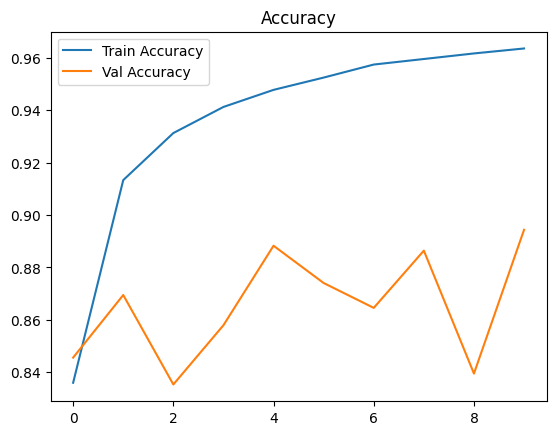

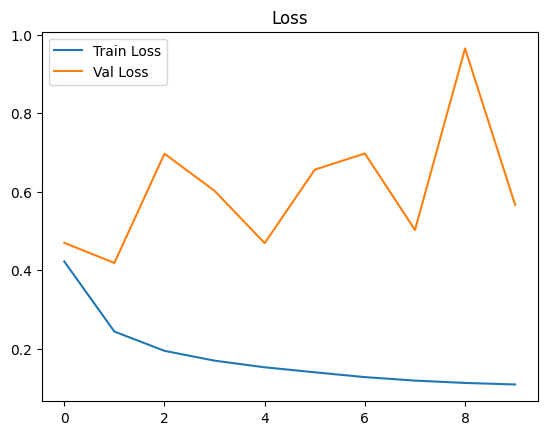

In [10]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()


In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Get one batch from the validation generator
images, labels = next(val_generator)  # Use your own generator if different

# Predict the class probabilities
pred_probs = model.predict(images)

# Get predicted and true labels
pred_labels = np.argmax(pred_probs, axis=1)
true_labels = np.argmax(labels, axis=1)

# Get class names from generator
class_names = list(val_generator.class_indices.keys())

# Show 12 sample predictions
plt.figure(figsize=(15, 10))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(images[i].squeeze(), cmap='gray')  # squeeze() handles shape (64, 64, 1)
    plt.axis('off')
    plt.title(f"True: {class_names[true_labels[i]]}\nPred: {class_names[pred_labels[i]]}",
              color='green' if pred_labels[i] == true_labels[i] else 'red')
plt.tight_layout()
plt.suptitle("Validation Predictions", fontsize=16)
plt.subplots_adjust(top=0.88)
plt.show()


NameError: name 'val_generator' is not defined

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)


In [13]:
# Set your image size and batch size
IMG_SIZE = 64
BATCH_SIZE = 32

# Create train and validation generators
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode='grayscale',  # or 'rgb' if your images are colored
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode='grayscale',
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)


Found 121321 images belonging to 3 classes.
Found 30328 images belonging to 3 classes.


In [14]:
images, labels = next(val_generator)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step


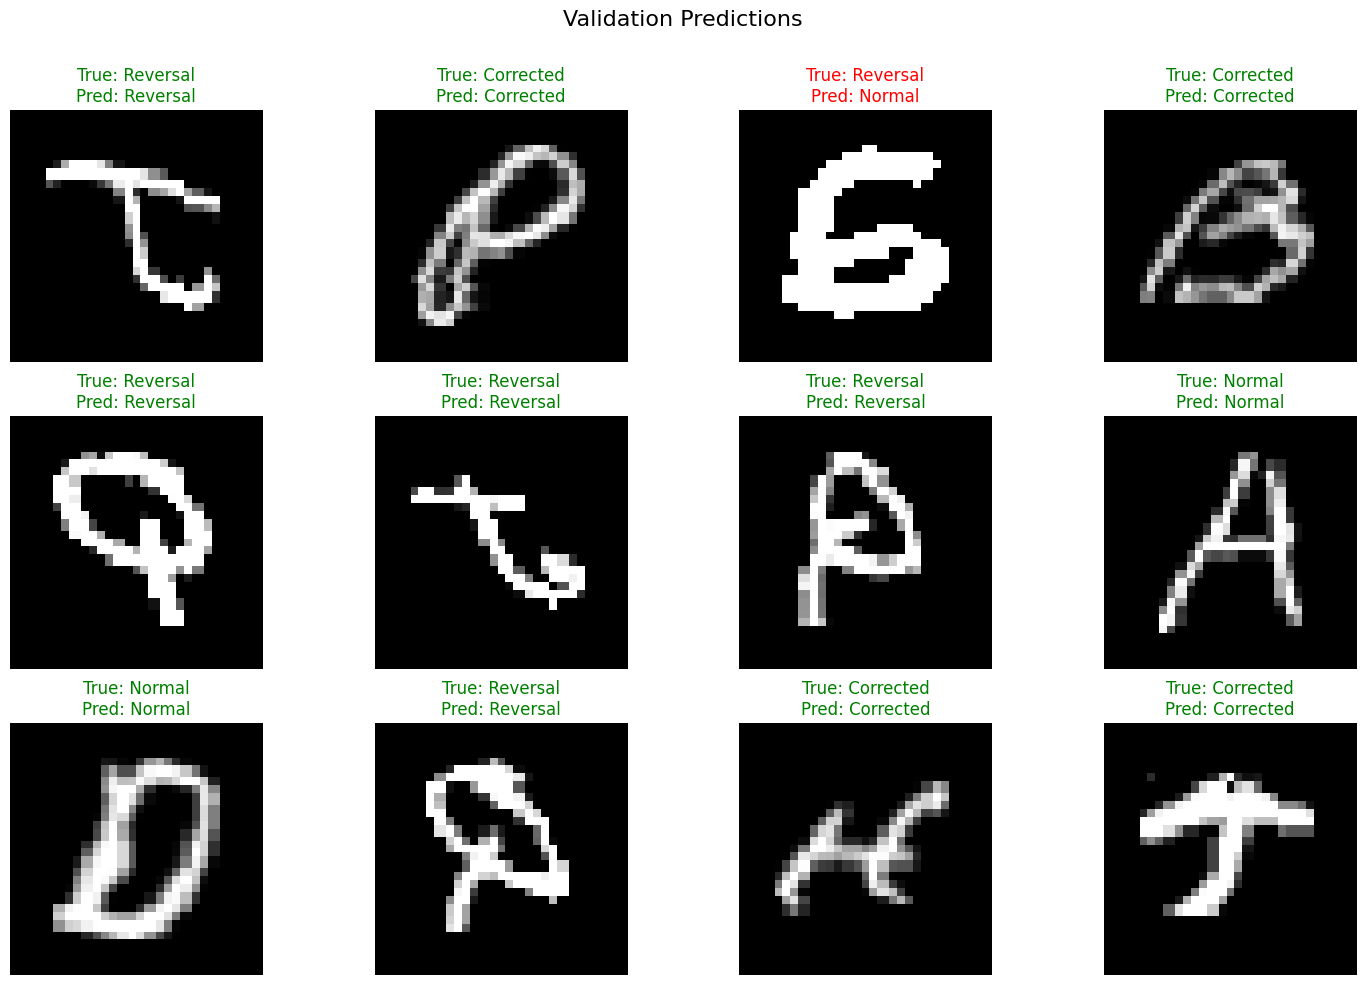

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Get one batch from the validation generator
images, labels = next(val_generator)  # Use your own generator if different

# Predict the class probabilities
pred_probs = model.predict(images)

# Get predicted and true labels
pred_labels = np.argmax(pred_probs, axis=1)
true_labels = np.argmax(labels, axis=1)

# Get class names from generator
class_names = list(val_generator.class_indices.keys())

# Show 12 sample predictions
plt.figure(figsize=(15, 10))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(images[i].squeeze(), cmap='gray')  # squeeze() handles shape (64, 64, 1)
    plt.axis('off')
    plt.title(f"True: {class_names[true_labels[i]]}\nPred: {class_names[pred_labels[i]]}",
              color='green' if pred_labels[i] == true_labels[i] else 'red')
plt.tight_layout()
plt.suptitle("Validation Predictions", fontsize=16)
plt.subplots_adjust(top=0.88)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


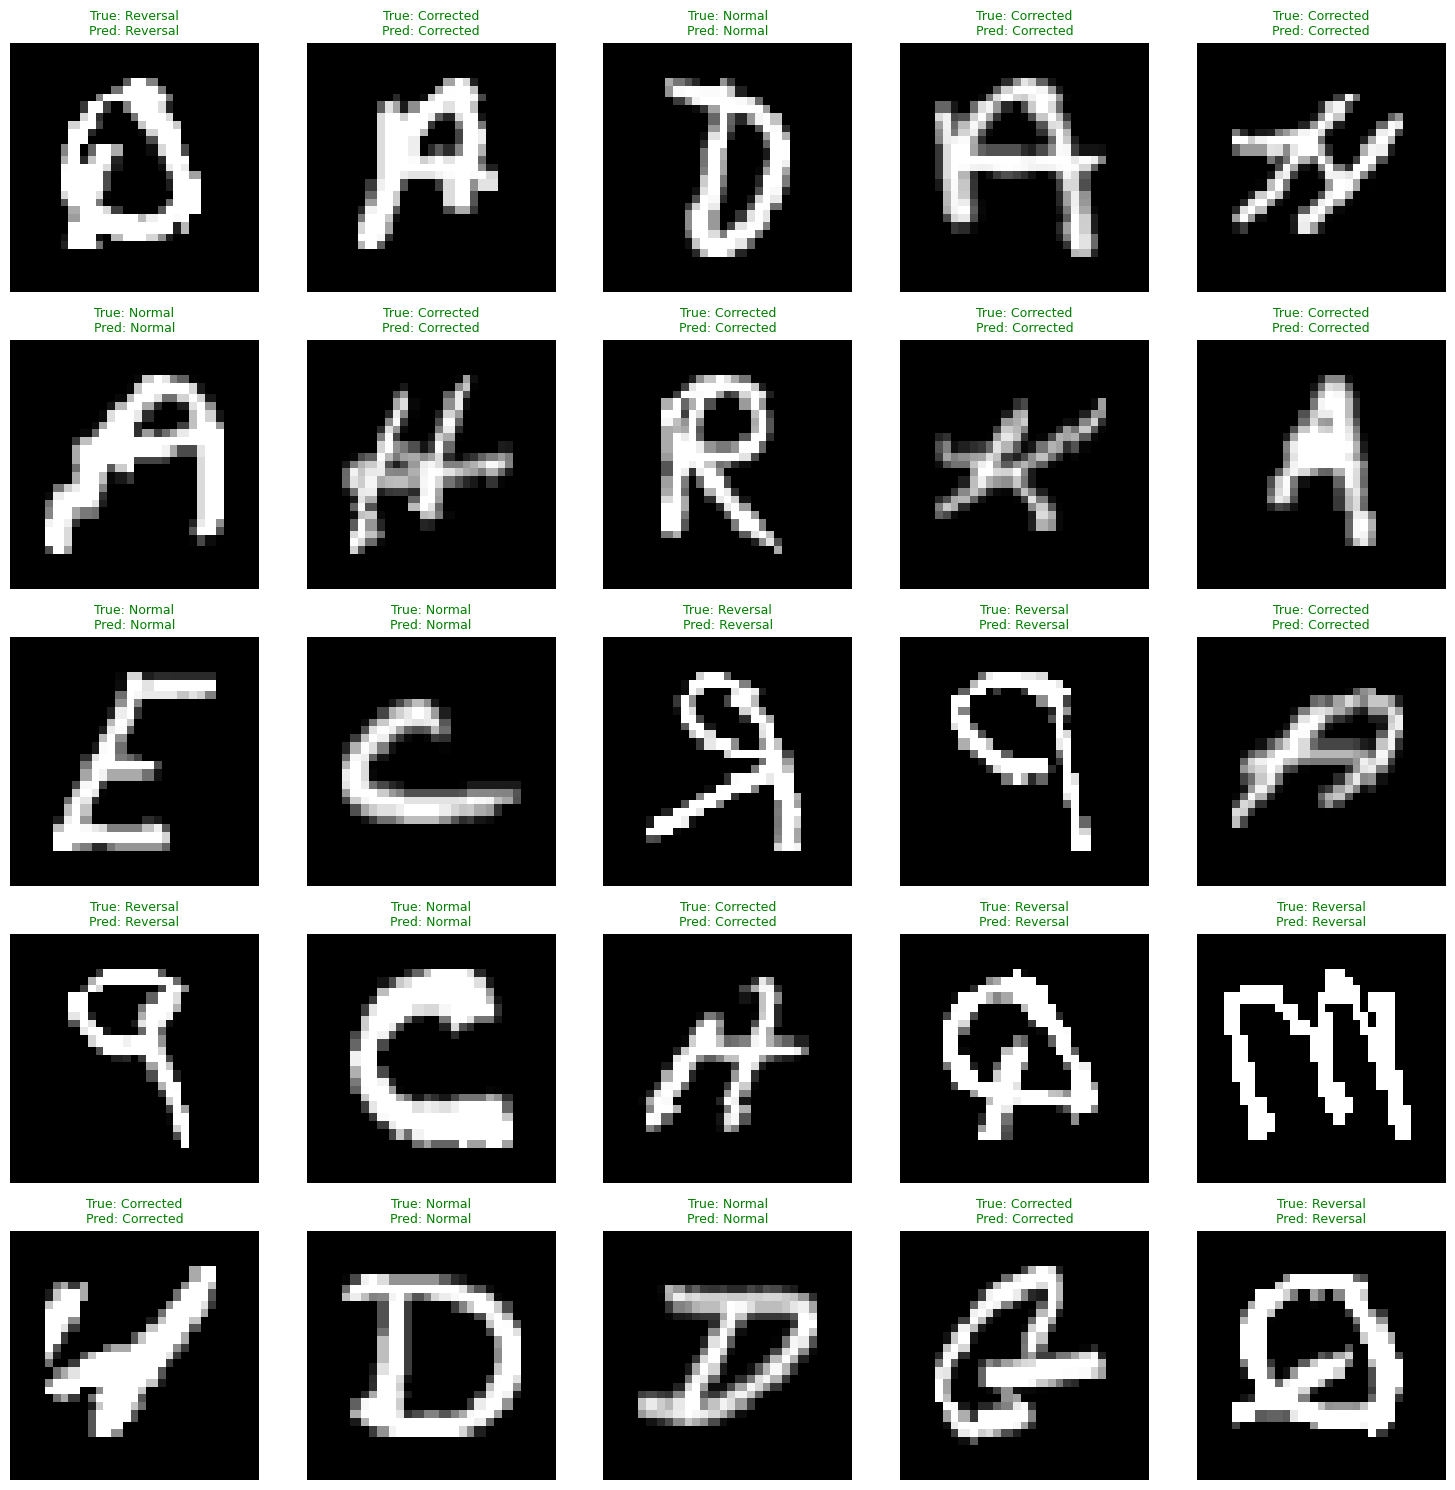

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Get a new batch from the validation generator
images, labels = next(val_generator)

# Predict class probabilities
pred_probs = model.predict(images)
pred_labels = np.argmax(pred_probs, axis=1)
true_labels = np.argmax(labels, axis=1)

# Class index to name mapping
class_names = list(val_generator.class_indices.keys())

# Plot first 25 predictions
plt.figure(figsize=(15, 15))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    img = images[i].squeeze()  # For grayscale
    plt.imshow(img, cmap='gray')  # Or remove cmap for RGB
    true_name = class_names[true_labels[i]]
    pred_name = class_names[pred_labels[i]]
    color = 'green' if true_name == pred_name else 'red'
    plt.title(f"True: {true_name}\nPred: {pred_name}", color=color, fontsize=9)
    plt.axis('off')
plt.tight_layout()
plt.show()


In [1]:
model.save("character_classifier_3class.keras")


NameError: name 'model' is not defined

In [2]:
from tensorflow.keras.models import load_model

# Step 1: Load the old .h5 model
old_model = load_model("character_classifier_3class.h5")

# Step 2: Save it in the new .keras format
old_model.save("character_classifier_3class.keras")

print("Conversion complete! Saved as character_classifier_3class.keras")


Conversion complete! Saved as character_classifier_3class.keras


In [3]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam

# Load the .h5 model
model = load_model("character_classifier_3class.h5")

# Recompile it (important!)
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Now save in the recommended format
model.save("character_classifier_3class.keras")

print("Model compiled and saved successfully in .keras format.")


Model compiled and saved successfully in .keras format.


In [1]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from tensorflow.keras.preprocessing.image import img_to_array

# Mount your Google Drive if loading images from there
# from google.colab import drive
# drive.mount('/content/drive')

# Load trained model
model = load_model("char_recognition_model.h5")  # Upload this to Colab first

# Define class labels (update as per your model)
label_map = {0: "normal", 1: "reversed", 2: "corrected"}

# Upload your test image using file picker (recommended for Colab)
from google.colab import files
uploaded = files.upload()

# Get the uploaded image path
import io
from PIL import Image

# Convert uploaded file to OpenCV image
image_path = list(uploaded.keys())[0]
img_pil = Image.open(io.BytesIO(uploaded[image_path])).convert('L')  # grayscale
img = np.array(img_pil)

# Ensure image is valid
if img is None:
    raise ValueError("Error: Image not loaded correctly.")

# Threshold the image to binary
_, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

# Morphological operations
kernel = np.ones((3, 3), np.uint8)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)

# Find external contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort contours left-to-right
contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])

min_char_area = 300  # Filter threshold
character_images = []
image_copy = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

# Padding + resize function
def pad_and_resize(char_img, target_size=(64, 64), padding=10):
    char_img = cv2.copyMakeBorder(char_img, padding, padding, padding, padding, cv2.BORDER_CONSTANT, value=0)
    char_img = cv2.resize(char_img, target_size, interpolation=cv2.INTER_AREA)
    char_img = char_img / 255.0
    char_img = np.expand_dims(char_img, axis=-1)
    char_img = np.expand_dims(char_img, axis=0)
    return char_img

# Extract characters
for i, ctr in enumerate(contours):
    x, y, w, h = cv2.boundingRect(ctr)
    area = w * h
    if area > min_char_area and h > 10:
        char_crop = thresh[y:y+h, x:x+w]
        char_img = pad_and_resize(char_crop)

        character_images.append(char_img)

        cv2.rectangle(image_copy, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Show each character
        plt.figure(figsize=(1, 1))
        plt.imshow(char_img.squeeze(), cmap='gray')
        plt.title(f"Character {i+1}")
        plt.axis("off")
        plt.show()

# Show full image with bounding boxes
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))
plt.title(f"Detected Characters: {len(character_images)}")
plt.axis("off")
plt.show()

print(f"Total characters detected: {len(character_images)}")


ModuleNotFoundError: No module named 'google.colab'

In [2]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
import os

# Load trained model
model = load_model("char_recognition_model.h5")

# Define class labels
label_map = {0: "normal", 1: "reversed", 2: "corrected"}

# Set your local image path here
image_path = r"C:\Users\Lenovo\Downloads\tokenize_img.jpg"  # <-- Change this to your image path

# Check if the image path exists
if not os.path.exists(image_path):
    raise ValueError("Error: Image not found. Check the file path.")

# Load the image in grayscale
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply thresholding
_, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

# Morphological operations
kernel = np.ones((3,3), np.uint8)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])

min_char_area = 300
character_images = []
filtered_contours = []
image_copy = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

for i, ctr in enumerate(contours):
    x, y, w, h = cv2.boundingRect(ctr)
    area = w * h

    if area > min_char_area and h > 10:
        char_img = thresh[y:y+h, x:x+w]
        char_img = cv2.resize(char_img, (64, 64))
        char_img = char_img / 255.0
        char_img = np.expand_dims(char_img, axis=-1)
        char_img = np.expand_dims(char_img, axis=0)

        character_images.append(char_img)
        filtered_contours.append((x, y, w, h))

        cv2.rectangle(image_copy, (x, y), (x + w, y + h), (0, 255, 0), 2)
        plt.figure(figsize=(1, 1))
        plt.imshow(char_img.squeeze(), cmap='gray')
        plt.title(f"Character {i+1}")
        plt.axis("off")
        plt.show()

# Show final result
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))
plt.title(f"Detected Characters: {len(character_images)}")
plt.axis("off")
plt.show()

print(f"Total characters detected: {len(character_images)}")


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'char_recognition_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)